In [1]:
from definitions import ROOT_DIR
from plot.plot_regret import plot_performance
from config import *
from agent.agents import *
from agent.switching_agents import *
from experiments.experiments import *
import pickle

with open(f'{ROOT_DIR}/outputs/eval_set', 'rb') as file:
    eval_set = pickle.load(file)

## Performance plots

Setting 1:
*   Machine cost 0.2
*   Machine state perfect
*   Human greedy w.r.t true next cell cost estimation
*   Human picks action at random with probability p = 0.2

Setting 2:
*   Machine cost 0.0
*   Machine ignores grass (grass --> road for machine)
*   Human greedy w.r.t true next cell cost estimation
*   Human picks action at random with probability p = 0.2
*   Human ignores car with probability p = 0.5


** Human policy approximation method: **
*   π_H(a|s) ~ n_times_a_picked_in_s / n_times_s_visited

* Problem * 
*   State with 6 from rows is rarely revisited
*   Trimmed states towards the end of the grid are visited more often
*   Machine picked mostly towards grid end
*   Offline not as expected 

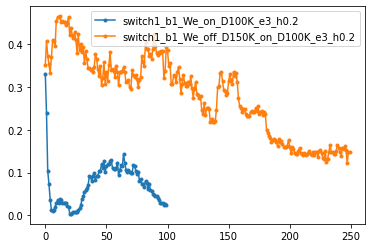

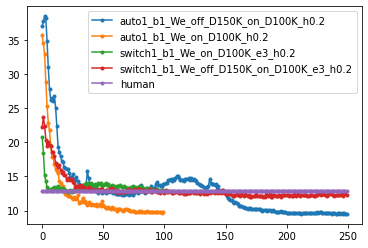

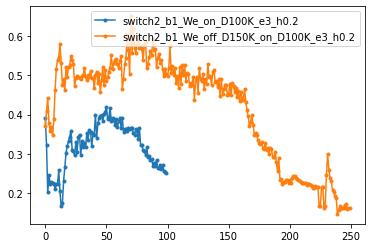

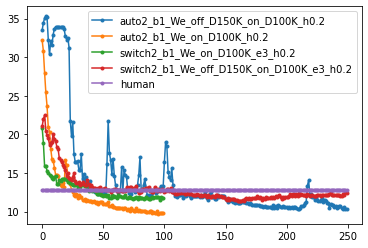

In [7]:
for setting in [1,2]:    
    with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_150000_agent_pureState', 'rb') as file:
        human = pickle.load(file)
        root_dir = f'{ROOT_DIR}/results/'
        agents = [f'auto{setting}_b1_We_off_D150K_on_D100K_h0.2',\
                  f'auto{setting}_b1_We_on_D100K_h0.2',\
                  f'switch{setting}_b1_We_on_D100K_e3_h0.2',\
                  f'switch{setting}_b1_We_off_D150K_on_D100K_e3_h0.2']
        df = plot_performance(root_dir,eval_set, agents, human=human)

In [74]:
cnt = 0
freq = np.array(list(human.policy_approximation.values())).flatten()
cnt = len(list(filter(lambda x : x>1, freq)))
    
print(f'{cnt/freq.size}')

0.014447182700066083


In [6]:
# 1 rollout
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_150000_agent_pureState', 'rb') as file:
        human = pickle.load(file)
# 10 rollouts
with open(f'{ROOT_DIR}/outputs/trajectories/humanloc2_0.2_{switching_noise}_{init_traffic_level}_trajectories_10000_agent_pureState', 'rb') as file:
        human_roll = pickle.load(file)
# 30 rollouts     
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_5000_agent_pureState', 'rb') as file:
        human_roll2 = pickle.load(file)
# 60 rollouts     
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_2500_agent_pureState', 'rb') as file:
        human_roll3 = pickle.load(file)
# 100 rollouts     
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_1500_agent_pureState', 'rb') as file:
        human_roll4 = pickle.load(file)
# 15 rollouts
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_10000_agent_pureState', 'rb') as file:
        human_roll1 = pickle.load(file)

In [7]:
for hum in [human, human_roll, human_roll1, human_roll2,human_roll3, human_roll4]:
    cnt = 0
    freq = np.array(list(hum.policy_approximation.values())).flatten()
    freq0 = len(list(filter(lambda x : x==0, freq)))/freq.size
    freqge1 = len(list(filter(lambda x : x>1, freq)))/freq.size

    print(f'Relative frequences of values : zero {freq0:.3f},  > one {freqge1:.3f} ')

Relative frequences of values : zero 0.655,  > one 0.014 
Relative frequences of values : zero 0.432,  > one 0.331 
Relative frequences of values : zero 0.380,  > one 0.401 
Relative frequences of values : zero 0.288,  > one 0.513 
Relative frequences of values : zero 0.189,  > one 0.651 
Relative frequences of values : zero 0.126,  > one 0.756 


Instead of gathering trajectories from 150K different grids. only 10K unique grids are produced and 15 different trajectories are gathered form each grid. 

**Human policy approximation method**

*   human policy distribution is computed per grid

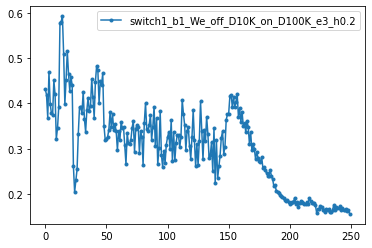

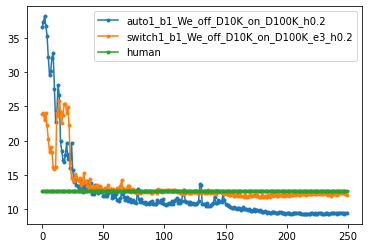

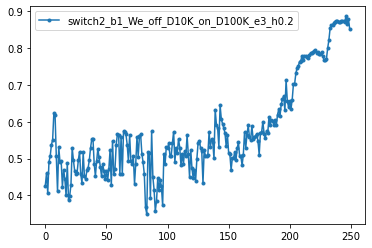

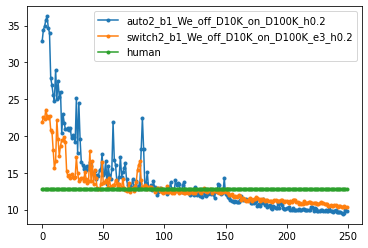

In [6]:
for setting in [1,2]:    
    with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_10000_agent_pureState', 'rb') as file:
        human = pickle.load(file)
        root_dir = f'{ROOT_DIR}/results/'
        agents = [f'auto{setting}_b1_We_off_D10K_on_D100K_h0.2', 
                  f'switch{setting}_b1_We_off_D10K_on_D100K_e3_h0.2']
        df = plot_performance(root_dir,eval_set, agents, human=human)

**100 rollouts 1.5K unique trajectories**

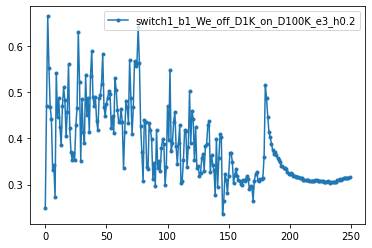

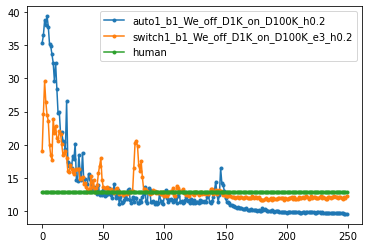

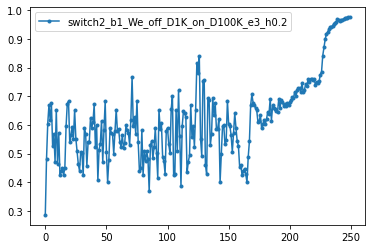

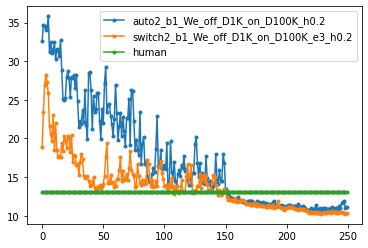

In [2]:
for setting in [1,2]:    
    with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_1500_agent_pureState', 'rb') as file:
        human = pickle.load(file)
        root_dir = f'{ROOT_DIR}/results/'
        agents = [f'auto{setting}_b1_We_off_D1K_on_D100K_h0.2', 
                  f'switch{setting}_b1_We_off_D1K_on_D100K_e3_h0.2']
        df = plot_performance(root_dir,eval_set, agents, human=human)

Qualitative plots

In [6]:

root_dir = ROOT_DIR+'/results'
estimation_noise = 0.2
switching_noise = 0.0
nk_traj = 1
sett = 2
dir = root_dir+f'/switch{sett}_b1_We_off_D{nk_traj}K_on_D100K_e3_h{estimation_noise}'

with open(f'{ROOT_DIR}/outputs/trajectories/human{sett}_{estimation_noise}_{switching_noise}_{init_traffic_level}_trajectories_{nk_traj}500_agent_pureState', 'rb') as file:
    human = pickle.load(file)
with open(f'{dir}/switching_agent_on', 'rb') as file:
    switch_full = pickle.load(file)
with open(f'{dir}/actor_agent_on', 'rb') as file:
    switch_machine = pickle.load(file)

human_only = FixedSwitchingHuman()
cost_difference = [ OptimalAgent(grid, switch_machine.control_cost).eval() - evaluate(human_only, [human], [grid], 1 )[0] for grid in eval_set]

In [7]:
cost_difference = np.array(cost_difference)
ind = np.argsort(cost_difference)[:30]
grids_to_plot = np.array(eval_set)[ind]

In [8]:
from plot.plot_path import *
import os 
root_plot_dir = f'{root_dir}/grid_plots'
if not os.path.exists(root_plot_dir):
    os.mkdir(root_plot_dir)
plot_dir = f'{root_plot_dir}/{dir.split("/")[-1]}' 
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

for i,grid in enumerate(grids_to_plot):
    plt_path = PlotPath(grid, n_try=1)
    cost = grid.plot_trajectory(switch_full, [human, switch_machine], plt_path, show_cf=False)
    plt_path.plot(f'{plot_dir}/grid_{i}.png')

Setting 1:
*   Human picks at random with p = 0.2
*   π(a|s) = 0.8 * (1 / n_opt) + 0.2*(1/3) if a==a_opt
*   π(a|s) =  0.2*(1/3) if a!=a_opt

Setting 2:
*   Human picks at random with p = 0.2 and ignores car with p_ignore = 0.5
*   π(a|s) = 0.8 * (1 / n_opt) + 0.2*(1/3) if a==a_opt and next_cell!='car'
*   π(a|s) = 0.5 * 0.8 + 0.5*0.8 * (1 / n_car) + 0.2*(1/3) if a==a_opt and next_cell=='car'
*   π(a|s) = 0.8 * (1 / n_road) + 0.2*(1/3) if a!=a_opt and next_cell=='car'
*   π(a|s) =  0.2*(1/3) if a!=a_opt and next_cell!='car'
               